# Задача Дирихле для уравнения Пуассона

Решите задачу Дирихле для уравнения Пуассона:
$$
\Delta u = 4, x_i \in [0, 1], i = 1, 2, \\
u\Big|_{x_1 = 0} = x_2^{2}, u\Big|_{x_1 = 1} = 1 + x_2^{2}, \\
u\Big|_{x_2 = 0} = x_1^{2}, u\Big|_{x_2 = 1} = 1 + x_1^{2}, 
$$

Точное решение задачи:
$$
u(x_1, x_2) = x_1^2 + x_2^2
$$

*Решение:*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Зададим условия задачи:

In [2]:
f = 4
u_0 = lambda x: x**2
u_1 = lambda x: 1 + x**2

## Метод Зейделя

Шаг сетки и граничные условия:

In [3]:
h = 1e-2
x = np.arange(0, 1+h, h)

grid = np.random.uniform(0, 1, (len(x), len(x)))
grid[0, :] = u_0(x)
grid[:, 0] = u_0(x)
grid[-1, :] = u_1(x)
grid[:, -1] = u_1(x)

Метод Зейделя:

In [4]:
from numba import njit

@njit
def Seidel_iteration(grid, h, f, n_iter=100):
    y = grid.copy()
    for k in range(n_iter):
        for i in range(1, y.shape[0]-1):
            for j in range(1, y.shape[1]-1):
                y[i, j] = (y[i+1, j] + y[i, j+1] + y[i-1, j] + y[i, j-1] - f * h**2) / 4
    
    return y

In [5]:
y_val = Seidel_iteration(grid, h, f, n_iter=1000)

Зададим истинную функцию и её значения:

In [6]:
u = lambda x1, x2: x1**2 + x2**2

In [7]:
X1, X2 = np.meshgrid(x, x)
u_val = u(X1, X2)

Посчитаем C1-норму разности аппроксимации и истинной функции:

In [8]:
np.max(np.abs(y_val - u_val))

0.09962125698097746

Зададим функцию подсчёта ошибки и посмотрим, как меняется ошибка в зависимости от h:

In [9]:
def measure_error(h):
    x = np.arange(0, 1+h, h)

    grid = np.random.uniform(0, 1, (len(x), len(x)))
    grid[0, :] = u_0(x)
    grid[:, 0] = u_0(x)
    grid[-1, :] = u_1(x)
    grid[:, -1] = u_1(x)

    y_val = Seidel_iteration(grid, h, f, n_iter=1000)
    
    X1, X2 = np.meshgrid(x, x)
    u_val = u(X1, X2)
    
    return np.max(np.abs(y_val - u_val))

In [10]:
steps = [h/(2**i) for i in range(0, 5)]
errors = [measure_error(step) for step in steps]

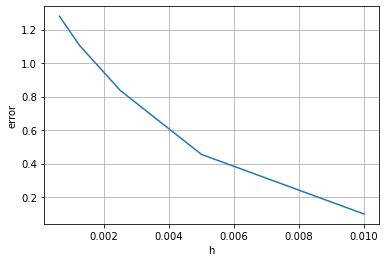

In [11]:
plt.plot(steps, errors)
plt.grid()
plt.xlabel('h')
plt.ylabel('error')
plt.show()

Как видно, зависимость похожа на квадратичную.

Отобразим функции на графике:

In [12]:
def plot_3d_subplots(X1, X2, u_val, y_val): 
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X1, X2, u_val)
    ax.view_init(30, 150)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('u')
    ax.set_title('Истинная функция')

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X1, X2, y_val)
    ax.view_init(30, 150)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('Аппроксимация')

    plt.show()

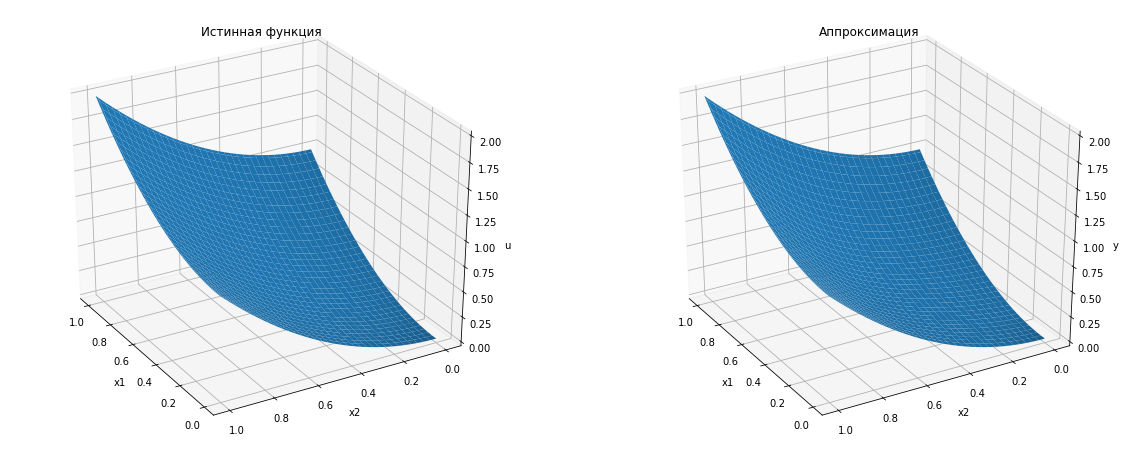

In [13]:
plot_3d_subplots(X1, X2, u_val, y_val)